In [186]:
# test2.ipynb - Jeff Wang - Tony Ho
# cd mnt/c/users/17789/desktop/353/final


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import signal

In [188]:
# Butterfly filter modified from: https://ggbaker.ca/data-science/content/filtering.html#filtering
def low_pass_fliter(noisy_signal):
    b, a = signal.butter(3, .1, btype='lowpass', analog=False)
    low_passed = signal.filtfilt(b, a, noisy_signal)
    return low_passed


In [189]:
df = pd.read_csv('Car-500m-30km.csv')
#df = pd.read_csv('testWalk1.csv') #takes a few seconds  
df

,time,ax,ay,az,at
0,0.004,-0.5013,-0.0010,-0.9803,1.101
1,0.004,-0.5459,0.0068,-1.0924,1.221
2,0.005,-0.5063,-0.0113,-1.1556,1.262
3,0.010,-0.4871,-0.0079,-1.1535,1.252
4,0.015,-0.3957,0.0451,-1.0816,1.153
...,...,...,...,...,...
480,2.431,-0.3966,0.2037,-0.3722,0.581
481,2.437,-0.5315,0.2647,-0.7244,0.937
482,2.441,-0.5094,0.3239,-0.9467,1.123
483,2.446,-0.4043,0.3214,-1.0461,1.167


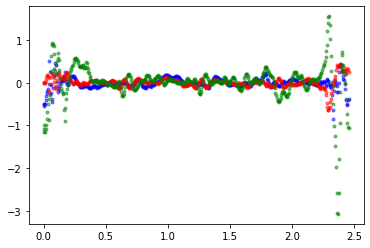

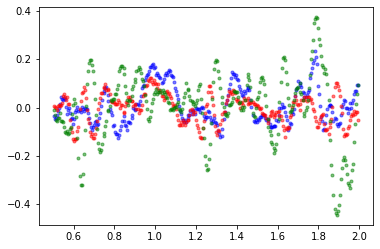

In [190]:
# Remove drift/ bias from standing still intially and end
df = df.loc[(df['time'] > 0.5) & (df['time'] < 2)].reset_index(drop=True)

# Plot ax, ay, az, at into a scatter plot
plt.plot(df['time'], df['ax'], 'b.', alpha = 0.5)
plt.plot(df['time'], df['ay'], 'r.', alpha = 0.5)
plt.plot(df['time'], df['az'], 'g.', alpha = 0.5)
# plt.plot(df['time'], df['at'], 'y.', alpha = 0.5)
plt.show()

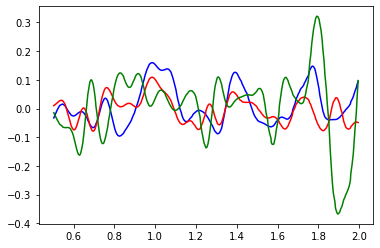

In [191]:
df['ax'] = low_pass_fliter(df['ax'])
df['ay'] = low_pass_fliter(df['ay'])
df['az'] = low_pass_fliter(df['az'])
# df['at'] = low_pass_fliter(df['at'])
plt.plot(df['time'], df['ax'], 'b')
plt.plot(df['time'], df['ay'], 'r')
plt.plot(df['time'], df['az'], 'g')
# plt.plot(df['time'], df['at'], 'y')
plt.show()

In [192]:
# Apply Fourier Transform (UNSURE)
# https://pythontic.com/visualization/signals/fouriertransform_fft
fourierTransform = np.fft.fft(df['ax'])/len(df['ax'])           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(df['ax'])/2))] # Exclude sampling frequency

samplingFrequency = 200
tpCount     = len(df['ax'])
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

fourierTransform

array([ 1.09579047e-02+0.00000000e+00j, -6.19456085e-03-2.21855234e-03j,
       -3.39651114e-03+1.88245729e-02j,  1.29451989e-02+3.68073218e-03j,
       -1.99892883e-02-2.21619709e-02j,  1.24948151e-02+2.01768896e-03j,
        1.36864143e-02+6.53683129e-03j,  5.11233694e-03-7.44580685e-03j,
        8.68624748e-04+1.01076051e-02j, -1.11012250e-02+2.72755673e-04j,
        2.67910877e-03+6.27952791e-03j, -8.18202200e-04-2.52965711e-03j,
        4.54497855e-03+1.57417019e-04j,  2.32533446e-03-1.96164989e-03j,
       -1.80987048e-03-2.48640764e-03j, -1.64376334e-03+4.49603136e-03j,
       -9.33011669e-04+2.26754397e-03j, -1.57025098e-03+3.24932434e-03j,
       -1.18073056e-03-2.78555254e-04j,  8.19643881e-04-3.67339835e-04j,
        2.61748615e-04+1.29697787e-03j,  7.56376739e-05+1.48843811e-03j,
       -6.45647884e-05+1.44006642e-03j, -2.18281875e-04+1.14844925e-03j,
       -2.74312636e-04+9.64282256e-04j, -2.31036855e-04+9.20105904e-04j,
       -2.85740218e-04+8.97487575e-04j, -1.87463412

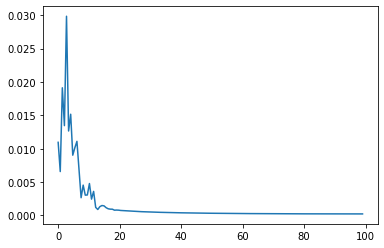

In [193]:
plt.plot(frequencies, abs(fourierTransform))
plt.show()